# Hypothesis Tests

## Introduction

In this notebook, we will discuss hypothesis tests. To understand statistical tests, it is useful to think about how a judge in a court must make a decision about whether to convict a defendant or not. The prosecution presents a case that the defendant is guilty, the case being a summary of the evidence that the defendant committed the crime. The judge does not know wheher the defendent is guilty or not, so he/she must rely on the evidence presented by the prosecution and determine if the evidence is strong enough to convict the defendant. The judge can make to types of error:

1. To convict an innocent person (Type I error)
2. Fail to convict a guilty person (Type II error)


| Reality/Decision | Convict | Fail to convict |
|----------|----------|----------|
| Defendent innocent    | Type I error   | Correct   |
| Defendent guilty    | Correct   | Type II error   |


In statistics we very much face the same situation as the judge. We have a research question, we collect data and we must decide whether the data appears consistent with some conjecture about the state of the world or not. The conjecture is usually called a hupothesis. 

## Hypothesis Testing

Let's say that we suspect that the share of customers interested in some of our products is $p \geq 0.7$ and suppose that we collect a sample of 100 customers and find that 60 of them are interested. The question is: is the sample consistent with our conjecture that the share of interested customers is at least 0.7?

$$
\begin{align*}
H_0&: p \geq 0.7 \quad \text{Null Hypothesis}\\
H_1&: p < 0.7 \quad \text{Alternative}
\end{align*}
$$

Now we need to decide whether our observed 60 interested customers are consistent with the null hypothesis. Intuitively, if the share of interested customers is 0.7, then we would expect to see 70 interested customers in our sample of 100 customers. The question is: is 60 interested customers too far from 70 to be consistent with the null hypothesis? In other words: if the share of interested customers is 0.7, how likely is it that we would see 60 or fewer interested customers in our sample of 100 customers?

To do this, we need to summarize the data in a single number that we can use to make a decision. Fortunately, in this case the number of interested customers in our sample is already a summary of the data. Nevertheless, it is useful to write it down formally. Let $X_1, X_2, \ldots, X_n$ are the answers of the $n = 100$ customers in our sample before they answer. Each $X_i$ is a random variable that can take the value 1 if the customer is interested in our products and 0 otherwise and because our sample is random, the first customer's answer is one with probability $p = 0.7$ and zero with probability $1 - p = 0.3$. The same is true for the second customer and so on.

Let us look at $p = 0.7$ which is closest to the alternative hypothesis. We can ask the question: what is the probability to observe 60 or fewer interested customers in our sample of 100 customers if the share of interested customers is 0.7? In order to answer this question, we need to know the distribution of the random variable $X = X_1 + X_2 + \ldots + X_{100}$. Assuming that the answers of the customers are independent, we have that $X$ is a binomial random variable with parameters $n = 100$ and $p = 0.7$. The probability mass function of a binomial random variable is given by

$$
\begin{align*}
P(X \leq 60) &= P(X = 0) + P(X = 1) + \ldots + P(X = 60)\\
&= \sum_{k = 0}^{60} \binom{100}{k} 0.7^k 0.3^{100 - k} \\
& = \binom{100}{0} 0.7^0 0.3^{100} + \binom{100}{1} 0.7^1 0.3^{99} + \ldots + \binom{100}{60} 0.7^{60} 0.3^{40}
\end{align*}
$$

It is cumbersome to calculate this sum by hand, so we will use the computer. In Python, we can use the `scipy.stats.binom` module to calculate the probability mass function of a binomial random variable. The function `binom.cdf` calculates the cumulative distribution function of a binomial random variable. The cumulative distribution function of a random variable $X$ is defined as $F(x) = P(X \leq x)$ and is exactly what we need here.

In [12]:
from scipy import stats
import numpy as np

n = 100
p = 0.7
p_hat = 0.6
expected_successes = p * n
observed_successes = p_hat * n

print("Probability of seeing less or equal to 60 successes out of 100 trials:", stats.binom.cdf(observed_successes, n, p))

Probability of seeing less or equal to 60 successes out of 100 trials: 0.020988576003924803


We have seen that the probability to observe 60 or fewer interested customers in our sample of 100 customers is about 0.021. This probability is called the p-value of the test and it is important to understand what it means. The number of successes (the interested customers) is a summary of the data (a statistic). When we computed the p-value using a population share of successes of 0.7, so the p-value is a **conditional** probability, the condition being that the null hypothesis is true. It tells you how surpirsing the data (as summarized by the statistic) is if the null hypothesis is true. This is similar to the approach in mathematics where we can prove something by assuming that some conjecture is true and then derive a contradiction. In applied statistics there is no such thing as a proof as in mathematics, but the p-value serves as a kind of probabilistic "proof". If it is very small, then the data is surprising if the null hypothesis is true and we choose to believe the data rather than the null hypothesis. If the p-value is large, then the data is not surprising and we can say that the data is consistent with the null hypothesis. To see this, we can run a small simulation to see how the p-value behaves if the null hypothesis is true.


In [13]:
## Generate a sample of 1000 binomial random variables, each showing the number of successes in 100 trials

sample100 = np.random.binomial(n, p, size = 10000)

# Print the first 20 samples
print(sample100[0:20])
print("Mean of the samples:", np.mean(sample100))

# Now we can count the number of samples with less or equal to 60 successes

print("Number of samples with less or equal to 60 successes:", np.sum(sample100 <= 60))

[64 66 69 65 76 72 62 70 72 67 81 75 62 61 59 73 80 79 65 79]
Mean of the samples: 69.9858
Number of samples with less or equal to 60 successes: 203


In [14]:
1000 * 0.0209885760

20.988576

As the simulation shows, if the true share of the interested customers is 0.7, then we expect to get about 21 samples out of 1000 where the number of successes is less or equal to 60. This is a rare event, so with a p-value of 0.021 we can reject the null hypothesis that the share of interested customers is at least 0.7. In other words, the data is not consistent with the null hypothesis. At this point you should be asking the question: how surprising must the data be so that we conclude that the data is inconsistent with the conjecture. This question does not have a definitive answer, but a common rule of thumb is to reject the null hypothesis if the p-value is less than 0.05. This is called the 5% significance level.

## Confidence Interval for the Population Proportion

The observed proportion of successes in the last example served as an estimate for the population proportion. Indeed, we have shown that this is the maximum likelihood estimate. While the estimate is useful, it does not relate any information about the uncertainty behind it. We know that there is uncertainty, because we have calculated the estimate using a single sample and we are aware of the fact that we could have selected another sample and we could have obtained another result.

The following figure shows compares the distributions of the sample proportion over 10,000 samples for a sample size of 100 and a sample size of 1,000. All samples are drawn from a population with a share of successes of 0.7. In the figure you can see that the 
distribution of the sample proportion is narrower for a sample size of 1,000 compared to a sample size of 100. Intuitively, this makes sense, because the more data we have, the more we can learn about the population. The wider distribution in the case of the smaller sample size means that we are more uncertain about the population proportion, because our estimate could have been very different if we had selected another sample. In the more narrow distribution, we are more certain about the population proportion, because it does not matter that much which sample we select.

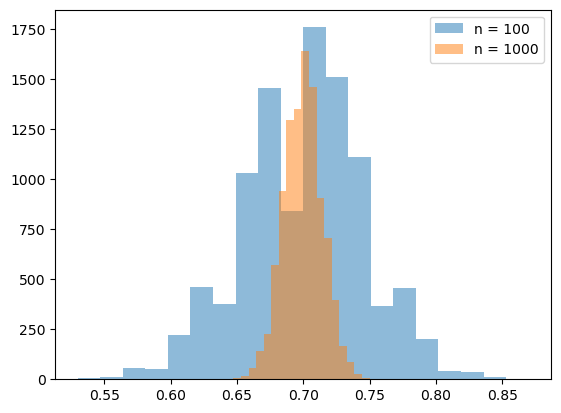

In [44]:
# Visualize the distribution of the samples

import matplotlib.pyplot as plt

n1000 = 1000
sample1000 = np.random.binomial(n1000, p, size = 10000)

# Create two histograms for the two samples

plt.hist(sample100 / n, bins = 20, alpha = 0.5, label = "n = 100")
plt.hist(sample1000 / n1000, bins = 20, alpha = 0.5, label = "n = 1000")
plt.legend(loc = "upper right")
plt.show()

Using the distribution above, we can calculate a interval of plausible values for the population proportion. 

In [45]:
# Central 95% interval for the population proportion of successes

# Calculate the 0.025 and 0.975 quantiles of the distribution of the samples

q_025 = np.quantile(sample100 / n, 0.025)
q_975 = np.quantile(sample100 / n, 0.975)

print("Central 95% interval for the population proportion of successes:", q_025, q_975)

# About 95 percent of the samples have a proportion of successes between 0.61 and 0.79

np.mean((sample100 / n > q_025) & (sample100 / n < q_975))

Central 95% interval for the population proportion of successes: 0.61 0.79


0.9365

In the vast majority of practical applications, we only observe **one** sample and we don't have the luxury of a simulation to see the distribution of the sample proportion. However, we can use analytical methods to approximate this distribution. One very popular method relies on the central limit theorem. The central limit theorem states that the distribution of the sample mean of a random sample of size $n$ from a population with mean $\mu$ and variance $\sigma^2$ approaches a normal distribution with mean $\mu$ and variance $\sigma^2/n$ as $n$ approaches infinity. Thus, if we standardize the sample mean, we obtain a random variable that is approximately standard normally distributed.

$$
\begin{align*}
Z = \frac{\hat{p} - p}{\sqrt{p(1 - p)/n}} \approx N(0, 1)
\end{align*}
$$

Using this distribution we can calculate its quantiles and obtain a confidence interval for the population proportion.

In [46]:
# The 0.025 and 0.975 quantiles of the standard normal distribution

qn_025 = stats.norm.ppf(0.025)
qn_975 = stats.norm.ppf(0.975)

print("0.025 and 0.975 quantiles of the standard normal distribution:", qn_025, qn_975)

0.025 and 0.975 quantiles of the standard normal distribution: -1.9599639845400545 1.959963984540054


We known that 95 percent of the probability of a distribution is between its 0.025 and 0.975 quantiles, so

$$
\begin{align*}
P(-1.96 \leq Z \leq 1.96) &= 0.95\\
P\left(-1.96 \leq \frac{\hat{p} - p}{\sqrt{p(1 - p)/n}} \leq 1.96\right) &= 0.95\\
P\left(\hat{p} - 1.96 \sqrt{p(1 - p)/n} \leq p \leq \hat{p} + 1.96 \sqrt{p(1 - p)/n}\right) &= 0.95
\end{align*}
$$

Because the population proportion is unknown, we replace it with the sample proportion and we obtain a confidence interval for the population proportion.

$$
\begin{align*}
\left(\hat{p} - 1.96 \sqrt{\hat{p}(1 - \hat{p})/n}, \hat{p} + 1.96 \sqrt{\hat{p}(1 - \hat{p})/n}\right)
\end{align*}
$$


Standard error of the sample proportion of successes: [0.01436381 0.01449138 0.01454593 ... 0.01484641 0.01449138 0.01434922]


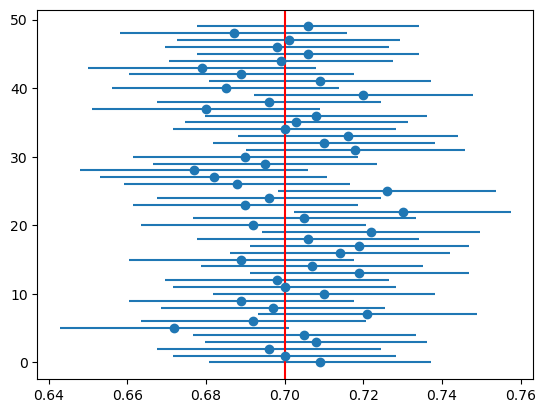

In [57]:
# Compute the confidence intervals for the population proportion of successes

p_hat = sample1000 / n1000
se = np.sqrt(p_hat * (1 - p_hat) / n1000)

print("Standard error of the sample proportion of successes:", se)
ci_025 = p_hat - qn_975 * se
ci_975 = p_hat - qn_025 * se

# Plot the confidence intervals

# Plot the confidence intervals and the population proportion of successes for the first 50 samples
# with the sample number on the y-axis

show_samples = 50


plt.errorbar(p_hat[0:show_samples], range(show_samples), xerr = qn_975 * se[0:show_samples], fmt = "o")
plt.axvline(p, color = "red")
plt.show()

# On the Use of the Normal Distribution

The central limit theorem tells us that the sample proportion is approximately normally distributed for large sample sizes. However, it does not tell us how large exactly the sample size must be. The goodness of the approximation depends on how the population distribution looks like. If the population distribution is very skewed, then the approximation may be poor. A common rule of thumb is that the sample size is large enough if $np \geq 5$ and $n(1 - p) \geq 5$.

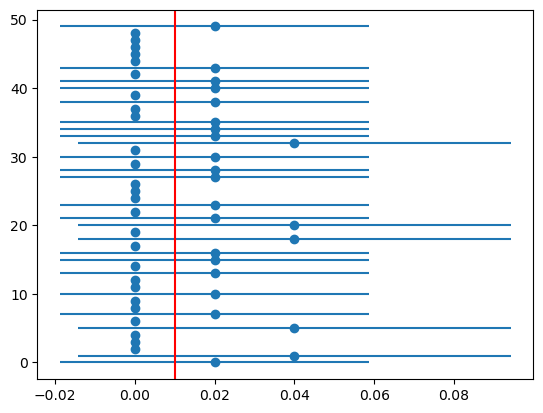

In [87]:
# The distribution of the sample proportion with a very skewed population proportion

p = 0.01
n = 50

sample1000_skewed = np.random.binomial(n, p, size = 10000)

p_hat_skewed = sample1000_skewed / n

se_skewed = np.sqrt(p_hat_skewed * (1 - p_hat_skewed) / n)

ci_025_skewed = p_hat_skewed - qn_975 * se_skewed
ci_975_skewed = p_hat_skewed - qn_025 * se_skewed

# Plot the confidence intervals and the population proportion of successes for the first 50 samples

plt.errorbar(p_hat_skewed[0:show_samples], range(show_samples), xerr = qn_975 * se_skewed[0:show_samples], fmt = "o")
plt.axvline(p, color = "red")
plt.show()


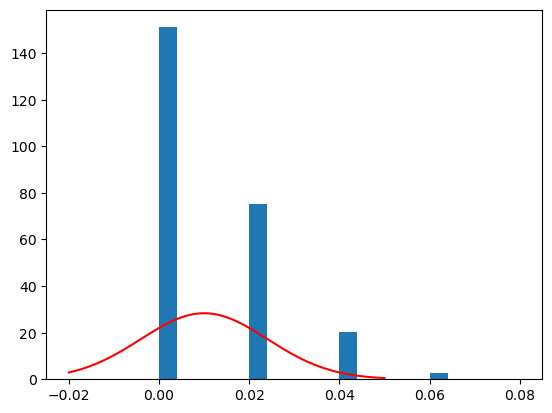

In [88]:
# Plot the distribution of the sample proportion of successes
# and overlay the normal approximation

plt.hist(p_hat_skewed, bins = 20, density=True)
x = np.linspace(-0.02, 0.05, 1000)
y = stats.norm.pdf(x, p, np.sqrt(p * (1 - p) / n))
plt.plot(x, y, color = "red")
plt.show()


## Tests for the Mean

Very often we are interested in the average value of a random variable. Consider for example the average height of a population. We collect a sample of $n = 80$ persons, ask them for their height and calculate the average height of the sample. We can ask the question: is the average height of the sample consistent with the conjecture that the average height of the population greater than 170 cm? Let us assume that all observations are independent and that the height of a person is normally distributed with mean $\mu$ and variance $\sigma^2$.

$$
\begin{align*}
H_0&: \mu \geq \mu_{H_{0}} = 170 \quad \text{Null Hypothesis}\\
H_1&: \mu < \mu_{H_{0}} = 170 \quad \text{Alternative}
\end{align*}
$$


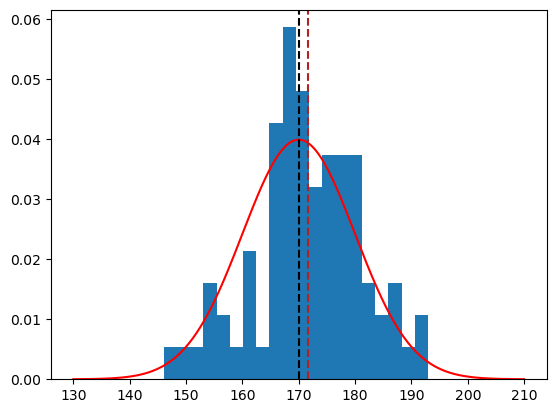

In [5]:
import matplotlib.pyplot as plt

# Simulate 80 draws from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10

sample100 = np.random.normal(mu, sigma, n)

# Plot the histogram of the sample and overlay the density of the normal distribution

plt.hist(sample100, bins = 20, density = True)
x = np.linspace(130, 210, 1000)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r')
plt.axvline(x = mu, color = 'black', linestyle = '--')
plt.axvline(x = sample100.mean(), color = 'firebrick', linestyle = '--')
plt.show()


A summary of the data is a statistic that is called the z-statistic and it is defined as

$$
z = \frac{\bar{X} - \mu_{H_{0}}}{\sigma/\sqrt{n}}
$$

where $\bar{X}$ is the average height of the sample. As the z-statistic is a function of the data (it depends on the sample mean $\bar{X}$), it is a random variable. If the null hypothesis is true, then the z-statistic is normally distributed with mean 0 and variance 1. The p-value of the test is the probability to observe a z-statistic less than or equal to the observed z-statistic. In Python, we can use the `scipy.stats.norm` module to calculate the cumulative distribution function of a normal random variable. The function `norm.cdf` calculates the cumulative distribution function of a normal random variable.

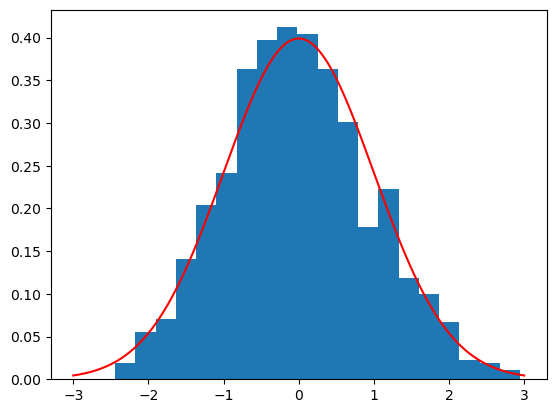

In [6]:
# Simulate 1000 samples of size 80 from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - mu) / (sigma / np.sqrt(n))

# Plot the histogram of the z-statistics and overlay the density of the standard normal distribution

plt.hist(z, bins = 20, density = True)
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, 'r')
plt.show()



What you see in the graphic above is called the distribution of the z-statistic under the null hypothesis (i.e. assuming that it is true). We can use this distribution much in the same way as we used the binomial distribution in the previous example. Small values of the z-statistic are surprising if the null hypothesis is true and we can reject the null hypothesis if the p-value is less than 0.05.

In [7]:
# z-statistic for the sample

z = (sample100.mean() - mu) / (sigma / np.sqrt(n))
print("z-statistic for the sample:", z)

# p-value for the z-statistic

p_value = stats.norm.cdf(z)
p_value

z-statistic for the sample: 1.5041820679189943


0.9337327531712283

The probability to observe a z-statistic less than or equal to the one computed in the sample is about 0.81. This is a large p-value, so we cannot reject the null hypothesis that the average height of the population is at least 170 cm. Now, this is not surprising, because we have taken the sample from a normal distribution with mean 170 cm. Let us now see how the distribution of the z-statistic looks like if the null hypothesis is false. We can do this by simulating the distribution of the z-statistic under the alternative hypothesis.

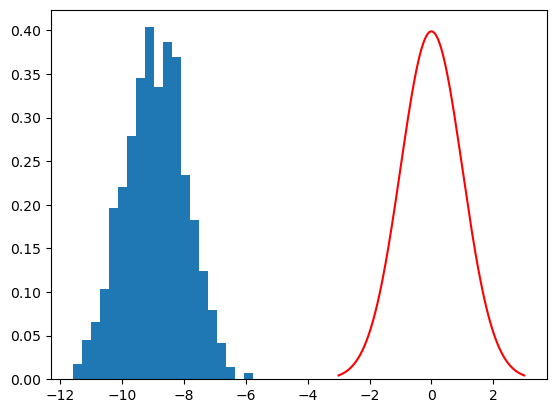

In [8]:
# Generate 1000 samples of size 80 from a normal distribution with mean 160 (a value from the alvernative) and standard deviation 10

n = 80
mu = 160
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - 170) / (sigma / np.sqrt(n))


# Plot the histogram of the z-statistics and overlay the density of the standard normal distribution

plt.hist(z, bins = 20, density = True)
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, 'r')
plt.show()



What you should see in this simulation is that the distribution of the z-statistic is shifted to the left and is not the same as the distribution of the z-statistic under the null hypothesis (the red density curve). This is because the average height of the population from wich we have taken the samples is 160 cm, not 170 as in the null hypothesis.

In [9]:
# Take a single sample of size 80 from a normal distribution with mean 160 and standard deviation 10, 
# calculate the z-statistic and compute its p-value

sample100 = np.random.normal(160, 10, n)

z = (sample100.mean() - 170) / (sigma / np.sqrt(n))

p_value = stats.norm.cdf(z)
p_value

4.102602988950774e-21

The p-value of the test is very small, so the data is extremely surprising. Here we reject the null hypothesis.

## Some Notes about the p-value

The p-value serves to reject or not to reject the null hypothesis. However, you should not consider it a measure of strength of evidence *for* the null hypothesis. As the p-value is calculated using the data, it itself is a random variable. It can be shown that under the null hypothesis it is uniformly distributed over the interval between 0 and 1. So, given a true null hypothesis, you would falsly reject it in 5% of the cases (different samples) if you follow the rule to reject for a p-value less than 0.05.


Number of p-values less than 0.05: 63
Proportion of p-values less than 0.05: 0.063


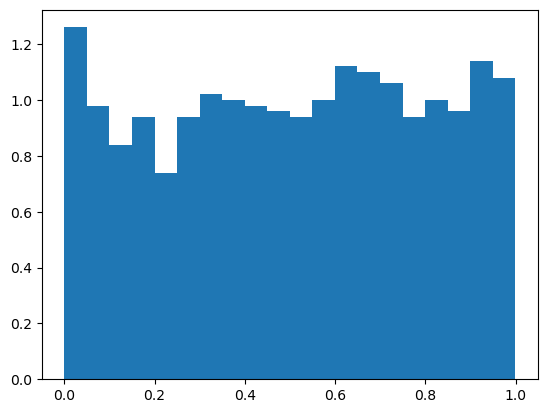

In [10]:
# Generate 1000 samples of size 80 from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - 170) / (sigma / np.sqrt(n))

# Calculate the p-value for each z-statistic

p_values = stats.norm.cdf(z)

# Count the number of p-values less than 0.05

print("Number of p-values less than 0.05:", np.sum(p_values < 0.05))

# Calculate the proportion of p-values less than 0.05

print("Proportion of p-values less than 0.05:", np.mean(p_values < 0.05))

# Show the histogram of the p-values

plt.hist(p_values, bins = 20, density = True)
plt.show()


## Critical Values

Another way to decide whether to reject the null hypothesis is to use a rejection region of values for the z-statistic. If the observed z-statistic is in the rejection region, then we reject the null hypothesis. Let's consider 

## On the Construction of the z-statistic

The z-statistic 

$$
z = \frac{\bar{X} - \mu_{H_0}}{\sigma/\sqrt{n}}
$$

consists of two parts: the nominator and the denominator. If the null hypothesis is true, meaning that the sample was selected from a population with mean $\mu_{H_0}$, then we expect the nominator to be close to zero because of the law of large numbers. So one possibility for the nominator to be far away from zero (positive or negative) is that the null hypothesis is false. Another possibility to see a large z-statistic is simply by chance. Chance occurrences of large differences between the sample mean and the population mean are more likely if the sample size is small or if the population standard deviation is large. This is the role of the denominator. It scales the nominator by the standard deviation of the sample mean and thus decreases the z-statistic if the sample size is small or the population standard deviation is large.

In [16]:
# Generate 1000 sample for each combination of n and sigma

n_values = [10, 40, 80]
sigma_values = [5, 20, 40]
R = 1000

for i, n in enumerate(n_values):
    for j, sigma in enumerate(sigma_values):
        samples = np.random.normal(170, sigma, (R, n))
        z_values_nominator = (samples.mean(axis = 1) - 170)
        z_values = z_values_nominator / (sigma / np.sqrt(n))
        print("n =", n, "sigma =", sigma, "Percentage of z-values nominator greater than 2 in absolute value:", 100 * np.mean(np.abs(z_values_nominator) > 2))
        print("n =", n, "sigma =", sigma, "Percentage of z-values graeter than 2 in absolute value:", 100 * np.mean(np.abs(z_values) > 2))


n = 10 sigma = 5 Percentage of z-values nominator greater than 2 in absolute value: 20.4
n = 10 sigma = 5 Percentage of z-values graeter than 2 in absolute value: 3.2
n = 10 sigma = 20 Percentage of z-values nominator greater than 2 in absolute value: 74.8
n = 10 sigma = 20 Percentage of z-values graeter than 2 in absolute value: 5.2
n = 10 sigma = 40 Percentage of z-values nominator greater than 2 in absolute value: 86.9
n = 10 sigma = 40 Percentage of z-values graeter than 2 in absolute value: 3.9
n = 40 sigma = 5 Percentage of z-values nominator greater than 2 in absolute value: 0.8999999999999999
n = 40 sigma = 5 Percentage of z-values graeter than 2 in absolute value: 4.3999999999999995
n = 40 sigma = 20 Percentage of z-values nominator greater than 2 in absolute value: 52.1
n = 40 sigma = 20 Percentage of z-values graeter than 2 in absolute value: 4.1000000000000005
n = 40 sigma = 40 Percentage of z-values nominator greater than 2 in absolute value: 74.2
n = 40 sigma = 40 Percent

## Test for the Mean with Unknown Variance

In most settings the population variance $\sigma^2$ is unknown and needs to be estiamted from the sample. In this case, we can plug in the sample variance $S^2$ in place of the population variance. The resulting statistic is called the t-statistic and is defined as

$$
t = \frac{\bar{X} - \mu}{S_x/\sqrt{n}}
$$

where $S_x$ is the sample standard deviation. The t-statistic is not normally distributed, but follows a t-distribution with $n - 1$ degrees of freedom (n is the number of observations in the sample). The p-value of the test is the probability to observe a t-statistic less than or equal to the observed t-statistic. In Python, we can use the `scipy.stats.t` module to calculate the cumulative distribution function of a t-distributed random variable. The function `t.cdf` calculates the cumulative distribution function of a t-distributed random variable.
